#**Introduction**

Olympic Games, athletic festival that originated in ancient Greece and was revived in the late 19th century.  The Olympic Games have come to be regarded as the world’s foremost sports competition.The International Olympic Committee (IOC) organises the Games and oversees the host city's preparations. In each Olympic event, gold medals are awarded for first place, silver medals are awarded for second place, and bronze medals are awarded for third place; this tradition began in 1904. The Winter Olympic Games were created out of the success of the Summer Olympics. It is regarded as the largest and most prestigious multi-sport international event in the world. 

##**About the Dataset**

There are 110 countries were added in 49 sports from year 2000 to 2012 in olympic games. Also contains player names with their age and number of gold , silver and brone medals , they won . With total medals they won.country of competitors, and year for every Olympic event .

##**Attribute Information**

* Name --- Nmae of the athletes
* Age --- Age of the atheletes
* Country --- Name of the country
* Year --- year of the event
* Date_Given --- Date which athelet participated
* Sprots --- Which Sport athelet partcicpating
* Gold_medals --- Number of gold medals win by the individual athelet
* Silver_medal ---Number of silver medals win by the individual athelet
* Bronze_mdeal --- Number of Bronze medals win by the individual athelet
* Toatal_medals --- Number of total medals win by the individual athelet

##Installing PySpark

In [ ]:
pip install pyspark # Installation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 64.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=bb222b87014f6226bd6f7e7335baae283fdd5f7bfccde134b4c7837e9a158774
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


##Importing Necessary Libraries

In [ ]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col, desc, asc, count
from pyspark.sql import functions as F


In [ ]:
spark = SparkSession.builder.appName("practice").getOrCreate()
spark.sparkContext.getConf().getAll();

##Write PySpark code to read the olympix_data.csv file

In [ ]:
df1 = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")# reading the file
df1.show()#its shows the 20 records


+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [ ]:
  row = df1.count() # total number of rows in dataframe
  # extracting number of columns from the Dataframe
  column = len(df1.columns) # total number of columns in dataframe
 

In [ ]:
 print(f'Number of Rows are: {row}')# printing the total rows
 print(f'Number of Columns are: {column}')#printing the total column

Number of Rows are: 8618
Number of Columns are: 10


Observation:
* There are total 8618 rows and 10 columns are there in dataset.

In [ ]:
df1.columns # its shows the columns

['name',
 'age',
 'country',
 'year',
 'Date_Given',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal']

observation-
* Reading the columns from the dataset

##Read the data with data types.

In [ ]:
df1.printSchema() # its shows the datatypes

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



observation-
* printSchema() is used to print or display the schema of the DataFrame in the tree format along with column name and data type

In [ ]:
# Find Count of Null, None, NaN of All DataFrame Columns
from pyspark.sql.functions import col,isnan, when, count
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show()


+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|   5|  5|      0|   0|         0|     0|         0|           0|          0|          0|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



In [ ]:
n=df1.filter(df1.name.isNull())# checking for null values by using isNull
n.show()

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+



observation-
* In column name and age there are 5 missing values and we found duplicates records
* To find count for selected columns in a list use list of column names instead of df1.columns. The below example yields the same output as above.

In [ ]:
df3 = df1.dropDuplicates()#Drop duplicates and returns the new dataframe
print("Distinct count: "+str(df3.count()))
df3.show(truncate=False)

Distinct count: 8615
+---------------------+---+---------------------+----+----------+-------------------------+----------+------------+-----------+-----------+
|name                 |age|country              |year|Date_Given|sports                   |gold_medal|silver_medal|brone_medal|total_medal|
+---------------------+---+---------------------+----+----------+-------------------------+----------+------------+-----------+-----------+
|Wang Meng            |20 |China                |2006|2/26/2006 |Short-Track Speed Skating|1         |1           |1          |3          |
|Rita König           |23 |Germany              |2000|10-01-2000|Fencing                  |0         |1           |1          |2          |
|Botond Storcz        |25 |Hungary              |2000|10-01-2000|Canoeing                 |2         |0           |0          |2          |
|Ole Einar Bjørndalen |36 |Norway               |2010|2/28/2010 |Biathlon                 |1         |1           |0          |2          |

Observation-
*   Run the dropDuplicates() function which returns a new DataFrame after removing duplicate rows.

In [ ]:
df3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df3.columns]).show()


+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|   2|  2|      0|   0|         0|     0|         0|           0|          0|          0|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



Observation:
* There are  2 null value in name and age columns

In [ ]:
df3.agg({"age": "avg"}).show()#using aggregate functions count ,counting the UniqueCarrier column

+------------------+
|          avg(age)|
+------------------+
|26.405433646812956|
+------------------+



Observation-

* Finding mean of the age column ,mean  of age is 26.40

In [ ]:
df3=df3.na.fill({"name":"unknown","age":26})# fill function is used the replce the dafault values


Observation-
* This replaces null values with an empty string for type column and replaces with a constant value “unknown” for name column.
* This replaces null values with an empty string for type column and replaces with a constant value “26” for age column.

In [ ]:
nulls=df3.filter(df3.name.isNull())# checking for null values by using isNull
nulls.show()

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



Observation-
* As we can see there are no more null values presented in our dataset.

#Dealing with special characters from the name column.

In [ ]:
from pyspark.sql.functions import udf# Importing necessary functions

def ascii_(x):# defining the function
    return x.encode('ascii', 'ignore').decode('ascii')#  the ascii values and decoding the data

ascii_udf = udf(ascii_) # storing the user define functions

df4 = df3.withColumn("name_spc_removed", ascii_udf('name'))# selecting the column from thr dataframe to perform udf and creating new column.
df4.show() # its shows the result

+--------------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+--------------------+
|                name|age|             country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|    name_spc_removed|
+--------------------+---+--------------------+----+----------+--------------------+----------+------------+-----------+-----------+--------------------+
|           Wang Meng| 20|               China|2006| 2/26/2006|Short-Track Speed...|         1|           1|          1|          3|           Wang Meng|
|          Rita König| 23|             Germany|2000|10-01-2000|             Fencing|         0|           1|          1|          2|           Rita Knig|
|       Botond Storcz| 25|             Hungary|2000|10-01-2000|            Canoeing|         2|           0|          0|          2|       Botond Storcz|
|Ole Einar Bjørndalen| 36|              Norway|2010| 2/28/2010|            B

##Write PySpark code to print the Olympic Sports/games in the dataset.

In [ ]:
unique_sports=df3.select('sports').distinct()#This should help to get unique sport of a column:
print("unique sport count: "+str(unique_sports.count()))#count the unique sport
unique_sports.show()# its show the result


unique sport count: 49
+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



Observation-
* You can see above result ,There are 49 unique  sports in olympic

##Write PySpark code to plot the total number of medals in each Olympic Sport/game

In [ ]:
df3.groupby("sports").sum("total_medal").show(n = 49)  # use group by for sports and sum for add total medal

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
|          Equestrian|             182|
|            Shooting|             192|


Observation-
* Above list of the total number of medals in each Olympic Sport/game

In [ ]:
import pandas as  pd   # use for data analysis
import matplotlib.pyplot as plt   # use for data visualisation
import seaborn as sns  # use for data visualisation

In [ ]:
oly= df3.toPandas()   # converting pyspark dataframe to pandas dataframe
oly.head(1)  # reading only 1st row

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Wang Meng,20.0,China,2006,2/26/2006,Short-Track Speed Skating,1,1,1,3


In [ ]:
total_sport = oly.groupby(['sports'])["total_medal"].sum().sort_values(ascending=False)
total_sport   # the total number of medals in  each Olympic Sport/game in descending order

sports
Swimming                     765
Athletics                    753
Rowing                       576
Football                     407
Hockey                       387
Ice Hockey                   384
Handball                     351
Canoeing                     333
Waterpolo                    306
Cycling                      306
Basketball                   287
Gymnastics                   282
Volleyball                   279
Fencing                      256
Wrestling                    245
Judo                         224
Baseball                     216
Sailing                      210
Shooting                     192
Boxing                       188
Equestrian                   182
Weightlifting                180
Cross Country Skiing         174
Diving                       144
Speed Skating                140
Biathlon                     138
Short-Track Speed Skating    138
Softball                     134
Synchronized Swimming        129
Taekwondo                    112
Bad

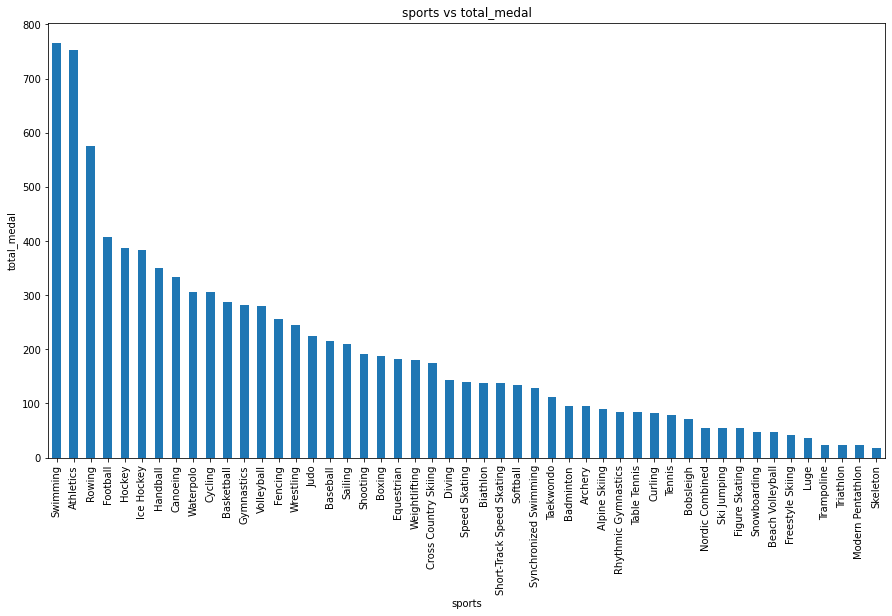

In [ ]:
total_sport.plot(kind='bar', title='sports vs total_medal', ylabel='total_medal',
         xlabel='sports', figsize=(15,8)) # bar plot sports vs total_medal

Observation-
* From above plot large total medals in sports like swimming,athletics, rowing, football and hockey

##Top 10 sports with total medals

In [ ]:
total_sport = oly.groupby(['sports'])["total_medal"].sum().sort_values(ascending=False).head(10)
total_sport   # the total number of medals in  each Olympic Sport/game in descending order

sports
Swimming      765
Athletics     753
Rowing        576
Football      407
Hockey        387
Ice Hockey    384
Handball      351
Canoeing      333
Waterpolo     306
Cycling       306
Name: total_medal, dtype: int32

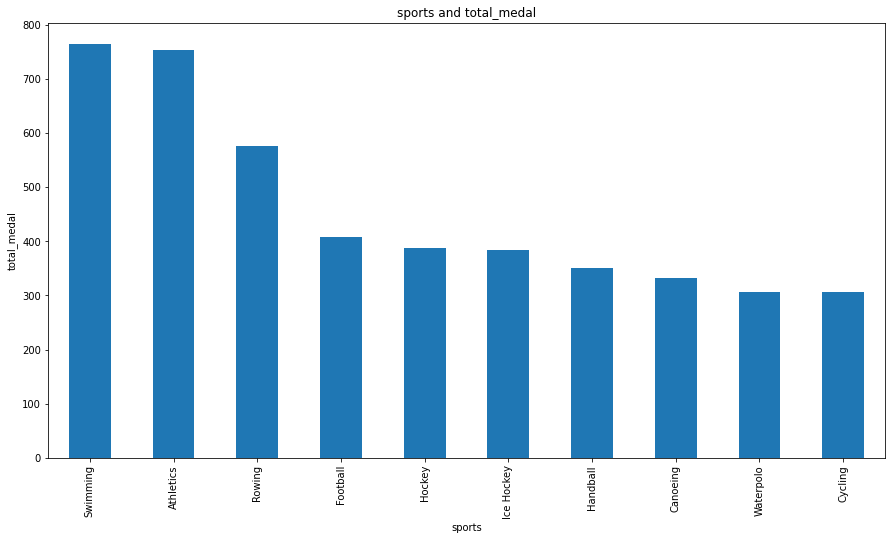

In [ ]:
total_sport.plot(kind='bar', title='sports and total_medal', ylabel='total_medal',xlabel='sports', figsize=(15,8)) # bar plot sports and total_medal

Observation:
* From above plot large total medals in sports like swimming,athletics, rowing, football and hockey

##Sort the result based on the total number of medals.

In [ ]:
df3.groupby("sports").sum("total_medal").orderBy(F.desc("sum(total_medal)")).show()#use gruop by and sum for total metals and order by for ordering and also use desc or descending ordering


+----------+----------------+
|    sports|sum(total_medal)|
+----------+----------------+
|  Swimming|             765|
| Athletics|             753|
|    Rowing|             576|
|  Football|             407|
|    Hockey|             387|
|Ice Hockey|             384|
|  Handball|             351|
|  Canoeing|             333|
| Waterpolo|             306|
|   Cycling|             306|
|Basketball|             287|
|Gymnastics|             282|
|Volleyball|             279|
|   Fencing|             256|
| Wrestling|             245|
|      Judo|             224|
|  Baseball|             216|
|   Sailing|             210|
|  Shooting|             192|
|    Boxing|             188|
+----------+----------------+
only showing top 20 rows



Observation-
* sorted total number of medals in each Olympic Sport/game
* As our result ,there are 765 medals in swimming in top place

##Find the total number of medals won by each country in swimming.

In [ ]:
#In sports columns filtering the swimming after that groupby from country column and counting the total medal ,after the signning the a varable
a=df3.filter((df3.sports== "Swimming")).groupBy("country").agg({"total_medal":"count"}).orderBy(F.desc("count(total_medal)"))
a.show()# its show the result

+-------------+------------------+
|      country|count(total_medal)|
+-------------+------------------+
|United States|               145|
|    Australia|                92|
|  Netherlands|                32|
|        Japan|                30|
|        China|                29|
|      Germany|                27|
|       France|                26|
|       Russia|                19|
|        Italy|                13|
|Great Britain|                 9|
| South Africa|                 8|
|       Sweden|                 7|
|       Brazil|                 7|
|      Hungary|                 7|
|       Canada|                 5|
|      Ukraine|                 4|
|      Romania|                 4|
|       Norway|                 2|
|        Spain|                 2|
|  South Korea|                 2|
+-------------+------------------+
only showing top 20 rows



Observation-
* united states got   a 145 medals in swimming
* austraila got a 92 medals in swimming
* nether lands got a 32 medals in swimming
* japan got a 30 medals in swimming
* china got a 29 medals in swimming
* germany got a 27 medals in swimming
* france got a 26 medals in swimmning
* Russia got a 19 medals in swimmning
* Italy got a 13 medals in swimmning

##Find the total number of medals won by each country in Skeleton.

In [ ]:
#In sports columns filtering the Skeleton after that groupby from country column and counting the total medal ,after the signning the b varable
b=df3.filter((df3.sports== "Skeleton")).groupBy("country").agg({"total_medal":"count"})
b.show()# its show the result

+-------------+------------------+
|      country|count(total_medal)|
+-------------+------------------+
|       Russia|                 1|
|      Germany|                 2|
|Great Britain|                 3|
|United States|                 3|
|  Switzerland|                 3|
|       Latvia|                 1|
|       Canada|                 4|
|      Austria|                 1|
+-------------+------------------+



Observation:
*  Canada got a 4 medals in skeleton
* great britain ,United States,  Switzerland got a 3 medals in skeleton
* germany got a 2 medals in skeleton
* russia, latvia,austria got a 1 medals in skeleton


##Find the number of medals that the US won yearly.

In [ ]:
#In sports columns filtering the United States after that groupby from year column and sum the total medal ,after the signning the c varable
c=df3.filter((df3.country== "United States")).groupBy("year").agg({"total_medal":"sum"})
c.show(10)# its show the result

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



Observation:
* in year 2008 got a 317 medals in US
* in year 2004 got a 265 medals in US
* in year 2012 got a 254 medals in US
* in year  2000 got a 243 medals in US

##Find the total number of medals won by each country.

In [ ]:
# groupby from country column and sum the total medal ,after the signning the d varable
d=df3.groupBy("country").agg({"total_medal":"sum"}).alias("sum(total_medal)").orderBy(F.desc("sum(total_medal)"))
d.show()# its show the result

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|United States|            1312|
|       Russia|             768|
|      Germany|             629|
|    Australia|             609|
|        China|             530|
|       Canada|             370|
|        Italy|             331|
|Great Britain|             322|
|       France|             318|
|  Netherlands|             318|
|  South Korea|             308|
|        Japan|             282|
|       Brazil|             219|
|        Spain|             205|
|       Norway|             192|
|         Cuba|             188|
|       Sweden|             181|
|      Hungary|             145|
|      Ukraine|             143|
|    Argentina|             140|
+-------------+----------------+
only showing top 20 rows



Observation:
* United States got a 1312 medals
* russia got a 768 medals
*  germany got a  629 medals


##Who was the oldest athlete in the olympics?

In [ ]:
df3.agg({'age': 'max'}).show()# use aggregate max function

+--------+
|max(age)|
+--------+
|      61|
+--------+



In [ ]:
df3.filter(df3.age==61).show() # filtering the age 

+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Observation:
* Ian Millar was oldest athlete

##Which country was he/she from?

In [ ]:
Age = df3.filter(df3.age == 61)  # filter age variable
Age.show() # show age

+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Observation:
* He was from Canada

##**Conclusion**

* Performed basic Exploration of Data Analysis in pyspark and handling with duplicate values deleted them to get effective results with missing values 
* Handling special character and  convert them from non ascii to ascii.
* converting pyspark dataframe to pandas dataframe and ploting the result by using pandas
* In sports columns filtering the Skeleton  and country wise and checking for number of medals that the US won yearly,total number of medals won by each country
*  checking for who is the oldest athlete in the olympics name and country